In [160]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [161]:
#Problem No.1 - Dataset: Book.csv

In [162]:
book=pd.read_csv("book.csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [163]:
#Aprioro Algorithm for min support=0.1 & Confidence

In [164]:
frequent_itemsets = apriori(book, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [165]:
frequent_itemsets = apriori(book, min_support = 0.1, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.1135,(ItalCook),1
8,0.1085,(Florence),1
9,0.1650,"(YouthBks, ChildBks)",2


In [166]:
#Rules when min_support = 0.1 and min_threshold for lift is 0.5

In [167]:
rules= association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237


In [168]:
rules.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
87,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
...,...,...,...,...,...,...,...,...,...
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678
13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240


In [169]:
import matplotlib.pyplot as plt

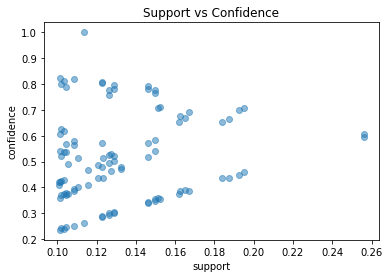

In [170]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [171]:
#Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [172]:
rules1=association_rules(frequent_itemsets,metric="confidence",min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
4,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
5,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
6,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105
8,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
9,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556


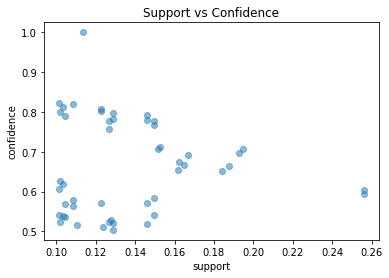

In [173]:
plt.scatter(rules1['support'], rules1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [174]:
rules1 = rules1.sort_values(['confidence', 'lift'], ascending =[False, False])
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
42,"(DoItYBks, ArtBks)",(CookBks),0.1235,0.4310,0.1015,0.821862,1.906873,0.048272,3.194159
44,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.4310,0.1085,0.818868,1.899926,0.051392,3.141354
47,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
25,"(RefBks, ChildBks)",(CookBks),0.1515,0.4310,0.1225,0.808581,1.876058,0.057204,2.972534
24,"(CookBks, RefBks)",(ChildBks),0.1525,0.4230,0.1225,0.803279,1.899004,0.057993,2.933083
37,"(GeogBks, ArtBks)",(ChildBks),0.1275,0.4230,0.1020,0.800000,1.891253,0.048067,2.885000
16,"(CookBks, YouthBks)",(ChildBks),0.1620,0.4230,0.1290,0.796296,1.882497,0.060474,2.832545
22,"(DoItYBks, ChildBks)",(CookBks),0.1840,0.4310,0.1460,0.793478,1.841017,0.066696,2.755158
34,"(GeogBks, DoItYBks)",(ChildBks),0.1325,0.4230,0.1045,0.788679,1.864490,0.048452,2.730446


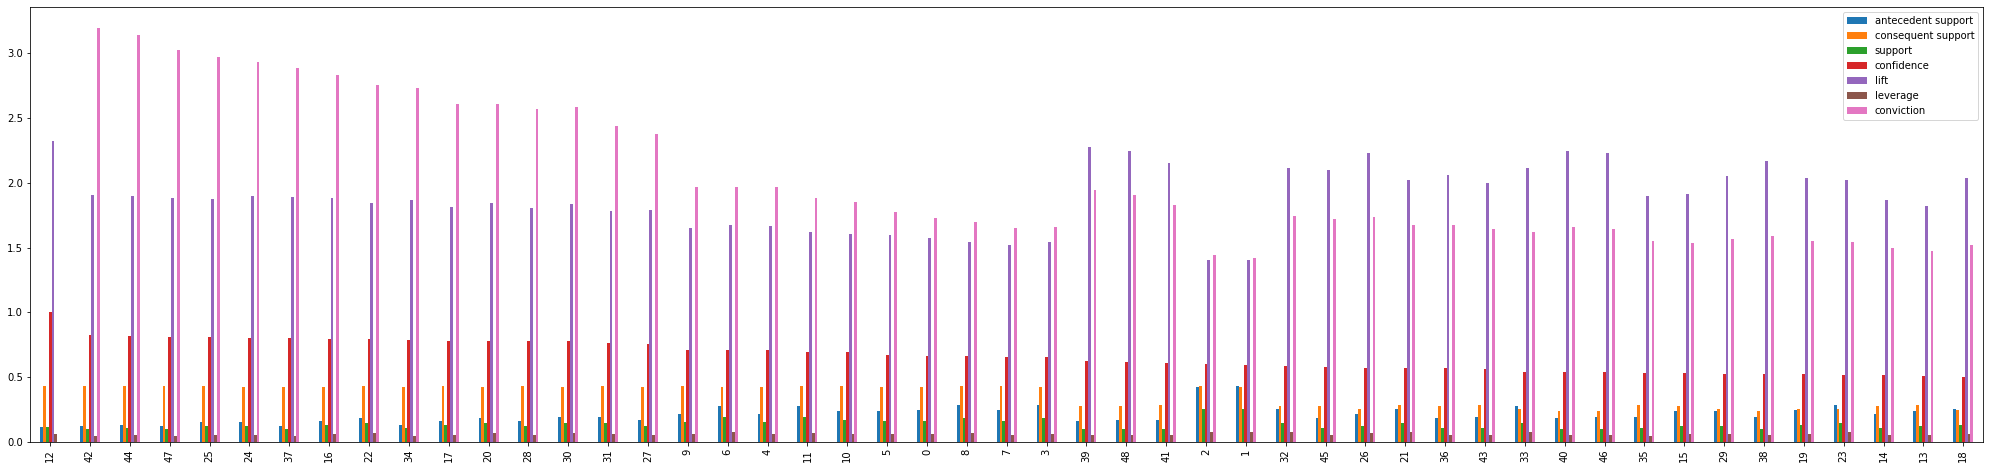

In [175]:
plot = rules1.plot.bar(figsize=(35,8))

In [176]:
#Apriori Algorithm for min_support = 0.2

In [177]:
frequent_itemsets1 = apriori(book, min_support=0.2, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [178]:
frequent_itemsets1 = apriori(book, min_support = 0.2, use_colnames=True)
frequent_itemsets1['length'] = frequent_itemsets1['itemsets'].apply(lambda x: len(x))
frequent_itemsets1

,support,itemsets,length
0,0.4230,(ChildBks),1
1,0.2475,(YouthBks),1
2,0.4310,(CookBks),1
3,0.2820,(DoItYBks),1
4,0.2145,(RefBks),1
5,0.2410,(ArtBks),1
6,0.2760,(GeogBks),1
7,0.2560,"(CookBks, ChildBks)",2


In [179]:
#Rules when min_support = 0.2 and min_threshold for lift is 0.5

In [180]:
rules2 = association_rules(frequent_itemsets1, metric="lift", min_threshold=0.5)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [181]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


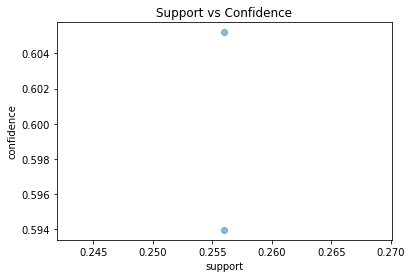

In [182]:
plt.scatter(rules2['support'], rules2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [183]:
#Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [184]:
rules3 = association_rules(frequent_itemsets1, metric="confidence", min_threshold=0.5)
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [185]:
rules3= rules3.sort_values(['confidence', 'lift'], ascending =[False, False])
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


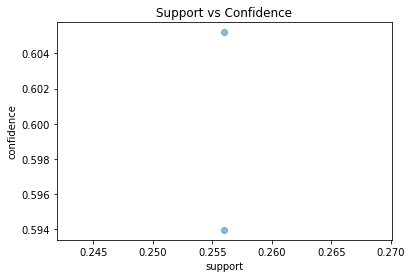

In [186]:
plt.scatter(rules3['support'], rules3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [187]:
rules3[rules3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [188]:
#Apriori Algorithm for min_support = 0.25

In [189]:
frequent_itemsets2 = apriori(book, min_support=0.25, use_colnames=True)
frequent_itemsets2

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)
2,0.282,(DoItYBks)
3,0.276,(GeogBks)
4,0.256,"(CookBks, ChildBks)"


In [190]:
frequent_itemsets2 = apriori(book, min_support = 0.25, use_colnames=True)
frequent_itemsets2['length'] = frequent_itemsets2['itemsets'].apply(lambda x: len(x))
frequent_itemsets2

,support,itemsets,length
0,0.423,(ChildBks),1
1,0.431,(CookBks),1
2,0.282,(DoItYBks),1
3,0.276,(GeogBks),1
4,0.256,"(CookBks, ChildBks)",2


In [191]:
#Rules when min_support=0.25 and min_thresold for lift is 0.6

In [192]:
rules4 = association_rules(frequent_itemsets2, metric="lift", min_threshold=0.6)
rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [193]:
rules4.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


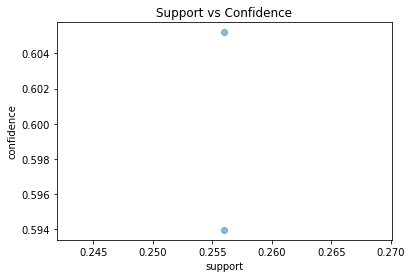

In [194]:
plt.scatter(rules4['support'], rules4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [195]:
#Rules when min_support=0.25 and min_thresold for confidence is 0.6

In [196]:
rules5 = association_rules(frequent_itemsets2, metric="confidence", min_threshold=0.6)
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


In [197]:
rules5 = rules5.sort_values(['confidence', 'lift'], ascending =[False, False])
rules5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124


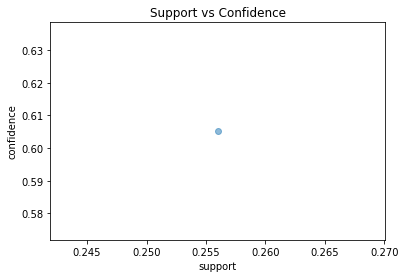

In [198]:
plt.scatter(rules5['support'], rules5['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e7d0bc8d0>,
      dtype=object)

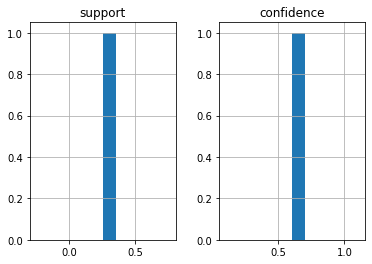

In [199]:
rules5[['support','confidence']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e7d123bd0>,
      dtype=object)

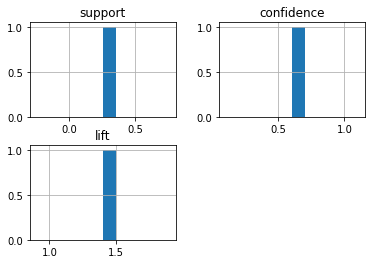

In [200]:
rules5[['support','confidence','lift']].hist()

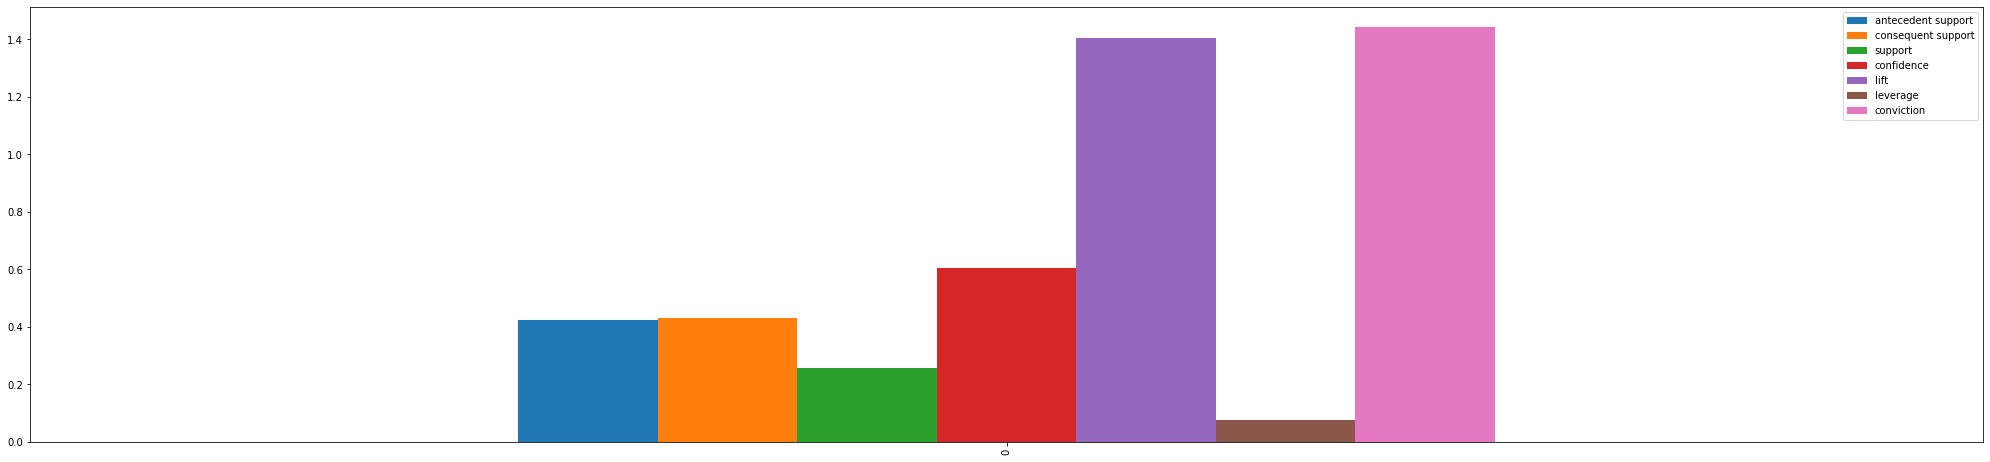

In [201]:
ax = rules5.plot.bar(figsize=(35,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


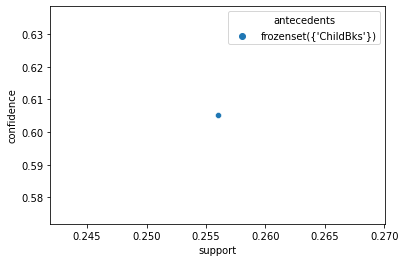

In [245]:
import seaborn as sns
sns.scatterplot('support', 'confidence', data=rules5, hue='antecedents')

plt.show()

# My Movies

In [202]:
#Problem No.2 - Dataset: my_movies.csv

In [203]:
movies=pd.read_csv("my_movies.csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [204]:
#Aprioro Algorithm for min support=0.1 & Confidence

In [205]:
df1=pd.get_dummies(movies)
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [206]:
frequent_itemsetss = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsetss

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott..."
1393,0.1,"(V2_LOTR1, V3_Harry Potter1, LOTR1, V5_LOTR2, ..."
1394,0.1,"(V2_LOTR1, V3_Harry Potter1, Harry Potter1, V5..."
1395,0.1,"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott..."


In [207]:
frequent_itemsetss = apriori(df1, min_support = 0.1, use_colnames=True)
frequent_itemsetss['length'] = frequent_itemsetss['itemsets'].apply(lambda x: len(x))
frequent_itemsetss

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
1392,0.1,"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",9
1393,0.1,"(V2_LOTR1, V3_Harry Potter1, LOTR1, V5_LOTR2, ...",9
1394,0.1,"(V2_LOTR1, V3_Harry Potter1, Harry Potter1, V5...",9
1395,0.1,"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",9


In [208]:
#Rules when min_support = 0.1 and min_threshold for lift is 0.5

In [209]:
rule= association_rules(frequent_itemsetss, metric="lift", min_threshold=0.5)
rule

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(LOTR2),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(Green Mile),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64250,(Sixth Sense),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


In [210]:
rule.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(V5_LOTR2, V3_Harry Potter1, Green Mile, LOTR2)","(Harry Potter1, LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33436,"(V5_LOTR2, Sixth Sense, LOTR2)","(Harry Potter1, V2_LOTR1, V4_Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33414,"(V5_LOTR2, V2_LOTR1, LOTR2)","(Harry Potter1, LOTR1, Sixth Sense, V4_Green M...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33415,"(V5_LOTR2, V2_LOTR1, Sixth Sense)","(Harry Potter1, LOTR1, LOTR2, V4_Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
33416,"(V5_LOTR2, V2_LOTR1, V4_Green Mile)","(Harry Potter1, LOTR1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1723,"(V1_Sixth Sense, Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
260,(Gladiator),"(Sixth Sense, V4_Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333
719,"(V1_Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.500000,0.714286,-0.04,0.600000
722,(Gladiator),"(V1_Sixth Sense, V4_Green Mile)",0.7,0.2,0.1,0.142857,0.714286,-0.04,0.933333


In [211]:
import matplotlib.pyplot as plt

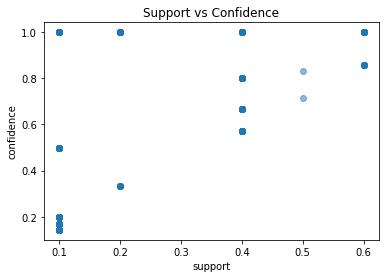

In [212]:
plt.scatter(rule['support'], rule['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [213]:
#Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [214]:
rule1=association_rules(frequent_itemsetss,metric="confidence",min_threshold=0.5)
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8
4,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
63233,(V5_LOTR2),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
63234,(V1_Sixth Sense),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63235,(LOTR2),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
63236,(Green Mile),"(V2_LOTR1, V3_Harry Potter1, LOTR1, Harry Pott...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


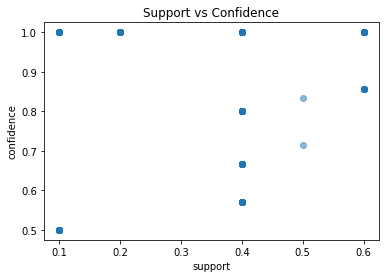

In [215]:
plt.scatter(rule1['support'], rule1['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [216]:
rule1 = rule1.sort_values(['confidence', 'lift'], ascending =[False, False])
rule1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,(Harry Potter2),(V1_Harry Potter1),0.1,0.1,0.1,1.0,10.000000,0.09,inf
103,(V1_Harry Potter1),(Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf
104,(Harry Potter2),(V2_Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf
105,(V2_Harry Potter2),(Harry Potter2),0.1,0.1,0.1,1.0,10.000000,0.09,inf
110,(V2_LOTR),(LOTR),0.1,0.1,0.1,1.0,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
1448,"(V1_Sixth Sense, Green Mile, Sixth Sense)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6
1482,"(Green Mile, Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6
1543,"(V1_Sixth Sense, Sixth Sense, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6
3262,"(V1_Sixth Sense, Green Mile, V4_Green Mile)",(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6


In [217]:
#Apriori Algorithm for min_support = 0.2

In [218]:
frequent_itemsetss1 = apriori(df1, min_support=0.2, use_colnames=True)
frequent_itemsetss1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio..."
77,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla..."
78,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi..."
79,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio..."


In [219]:
frequent_itemsetss1 = apriori(df1, min_support = 0.2, use_colnames=True)
frequent_itemsetss1['length'] = frequent_itemsetss1['itemsets'].apply(lambda x: len(x))
frequent_itemsetss1

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.2,(LOTR1),1
3,0.2,(Harry Potter1),1
4,0.6,(Patriot),1
...,...,...,...
76,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",5
77,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",5
78,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi...",5
79,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",5


In [220]:
#Rules when min_support = 0.2 and min_threshold for lift is 0.5

In [221]:
rule2 = association_rules(frequent_itemsetss1, metric="lift", min_threshold=0.5)
rule2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(V2_Patriot),"(Gladiator, V3_Sixth Sense, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
651,(Patriot),"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V1_Gladiator),"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [222]:
rule2[rule2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(V2_Patriot),"(Gladiator, V3_Sixth Sense, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
651,(Patriot),"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
652,(V1_Gladiator),"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


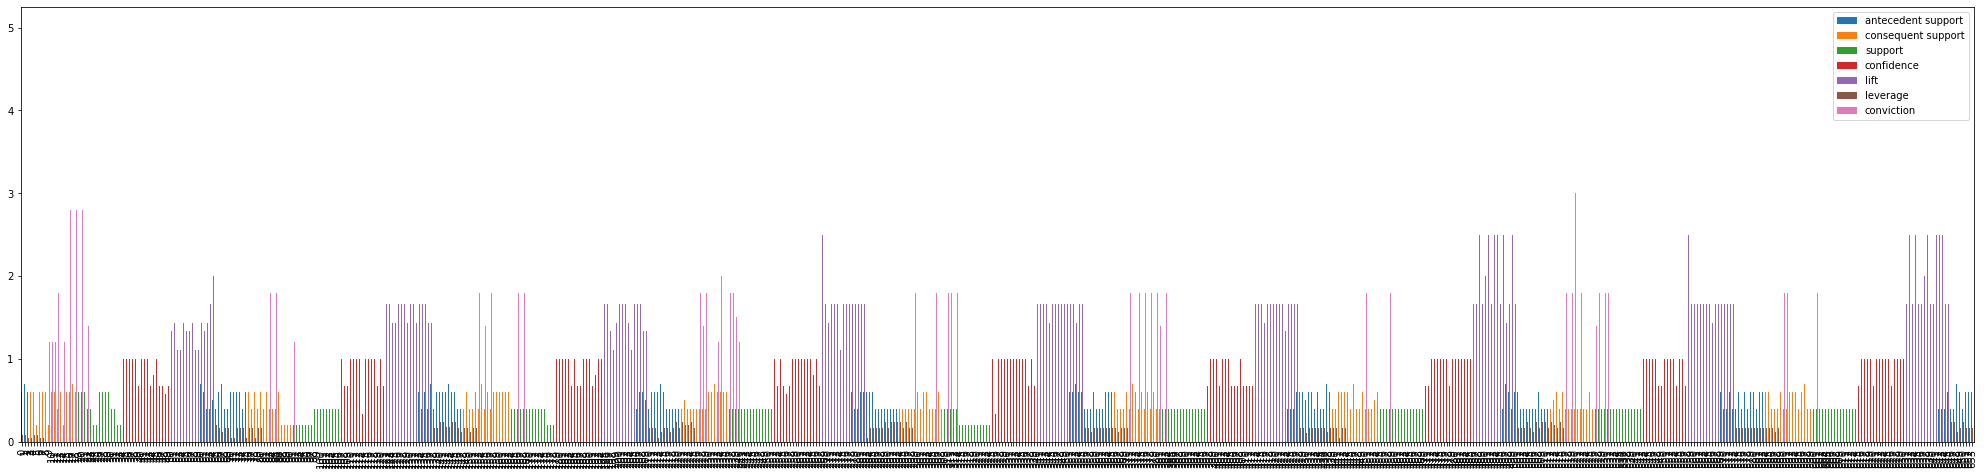

In [240]:
plot = rule2.plot.bar(figsize=(35,8))

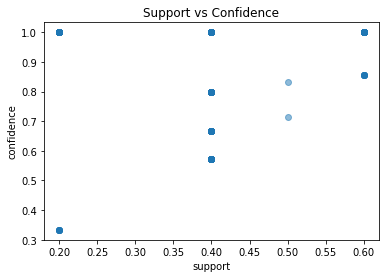

In [223]:
plt.scatter(rule2['support'], rule2['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [224]:
#Rules when min_support = 0.1 and min_threshold for confidence is 0.5

In [225]:
rule3 = association_rules(frequent_itemsetss1, metric="confidence", min_threshold=0.5)
rule3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
642,(V2_Patriot),"(Gladiator, V3_Sixth Sense, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
643,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
644,(Patriot),"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
645,(V1_Gladiator),"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [226]:
rules3= rules3.sort_values(['confidence', 'lift'], ascending =[False, False])
rules3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


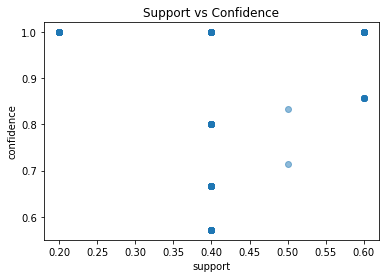

In [227]:
plt.scatter(rule3['support'], rule3['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [228]:
rule3[rule3.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
642,(V2_Patriot),"(Gladiator, V3_Sixth Sense, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
643,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
644,(Patriot),"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
645,(V1_Gladiator),"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [229]:
#Apriori Algorithm for min_support = 0.25

In [230]:
frequent_itemsetss2 = apriori(df1, min_support=0.25, use_colnames=True)
frequent_itemsetss2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
...,...,...
58,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio..."
59,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla..."
60,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi..."
61,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio..."


In [231]:
frequent_itemsetss2 = apriori(df1, min_support = 0.25, use_colnames=True)
frequent_itemsetss2['length'] = frequent_itemsetss2['itemsets'].apply(lambda x: len(x))
frequent_itemsetss2

,support,itemsets,length
0,0.6,(Sixth Sense),1
1,0.7,(Gladiator),1
2,0.6,(Patriot),1
3,0.6,(V1_Gladiator),1
4,0.6,(V2_Patriot),1
...,...,...,...
58,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",5
59,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",5
60,0.4,"(V2_Patriot, V3_Sixth Sense, Patriot, V1_Gladi...",5
61,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",5


In [232]:
#Rules when min_support=0.25 and min_thresold for lift is 0.6

In [233]:

rule4 = association_rules(frequent_itemsetss2, metric="lift", min_threshold=0.6)
rule4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
597,(V2_Patriot),"(Gladiator, V3_Sixth Sense, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
598,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
599,(Patriot),"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
600,(V1_Gladiator),"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [234]:
rule4.sort_values('lift',ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
546,"(Patriot, Gladiator, V3_Sixth Sense, V2_Patriot)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
286,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator, V2_Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
253,"(V1_Gladiator, V3_Sixth Sense)","(Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
254,"(V3_Sixth Sense, Patriot)","(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
559,"(Patriot, Sixth Sense, V1_Gladiator, V2_Patriot)","(Gladiator, V3_Sixth Sense)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
44,"(Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
45,(Sixth Sense),"(Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
61,"(V2_Patriot, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
175,(Sixth Sense),"(V2_Patriot, Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


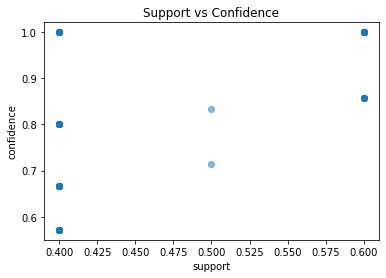

In [235]:
plt.scatter(rule4['support'], rule4['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

In [236]:
#Rules when min_support=0.25 and min_thresold for confidence is 0.6

In [237]:
rule5 = association_rules(frequent_itemsetss2, metric="confidence", min_threshold=0.6)
rule5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(V1_Gladiator),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
574,(V2_Patriot),"(Gladiator, V3_Sixth Sense, Patriot, V1_Gladia...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
575,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Patriot, V1_Gladiator,...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
576,(Patriot),"(Gladiator, V2_Patriot, V3_Sixth Sense, V1_Gla...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
577,(V1_Gladiator),"(Gladiator, V2_Patriot, V3_Sixth Sense, Patrio...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


In [238]:
rule5 = rule5.sort_values(['confidence', 'lift'], ascending =[False, False])
rule5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,"(Sixth Sense, Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
65,(V3_Sixth Sense),"(Sixth Sense, Patriot)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
75,"(Sixth Sense, V1_Gladiator)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
76,(V3_Sixth Sense),"(Sixth Sense, V1_Gladiator)",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
80,"(Sixth Sense, V2_Patriot)",(V3_Sixth Sense),0.4,0.4,0.4,1.000000,2.500000,0.24,inf
...,...,...,...,...,...,...,...,...,...
191,(Sixth Sense),"(Gladiator, V1_Gladiator, V2_Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
222,"(V2_Patriot, V1_Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
231,(Sixth Sense),"(V2_Patriot, V1_Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
343,"(Patriot, Gladiator, V1_Gladiator, V2_Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


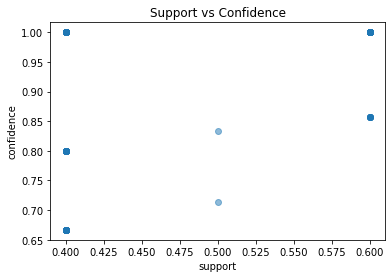

In [239]:
plt.scatter(rule5['support'], rule5['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e750383d0>,
      dtype=object)

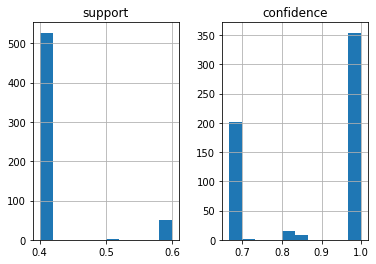

In [241]:
rule5[['support','confidence']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e76d68ed0>,
      dtype=object)

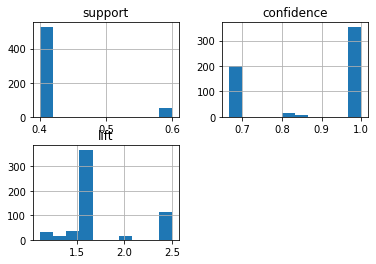

In [242]:
rule5[['support','confidence','lift']].hist()

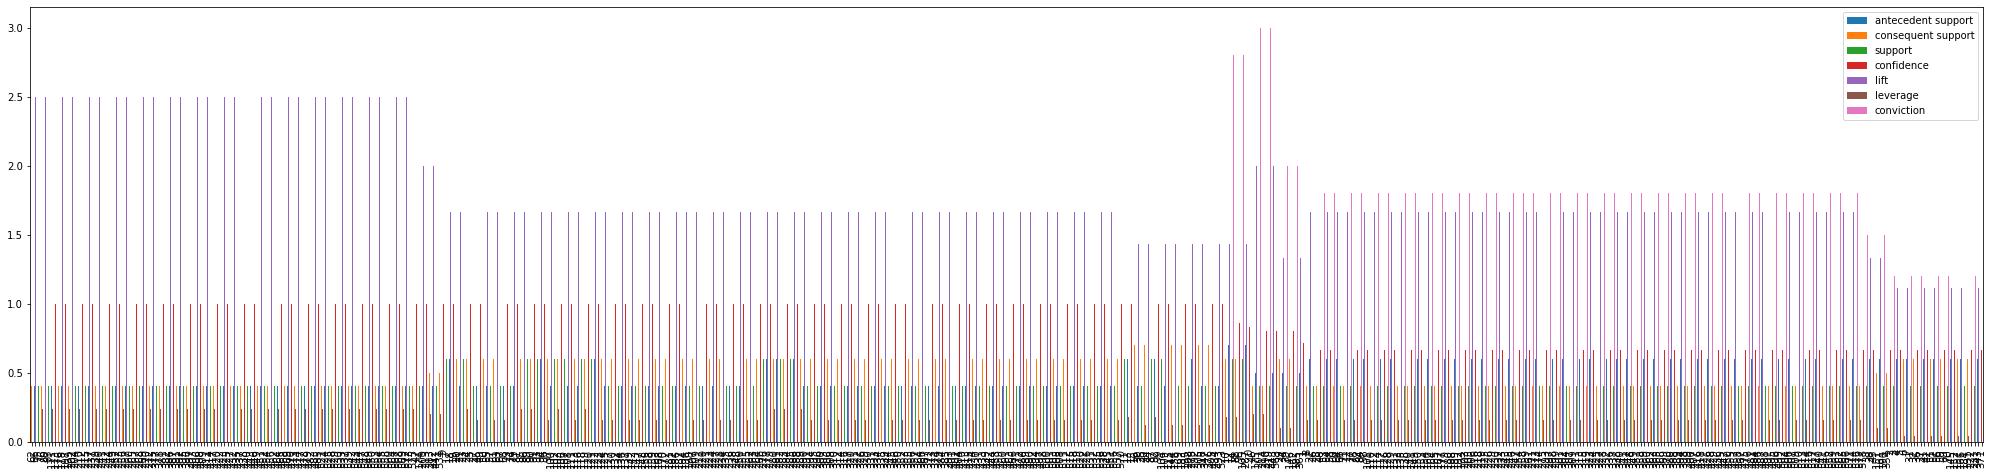

In [243]:
ax = rule5.plot.bar(figsize=(35,8))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


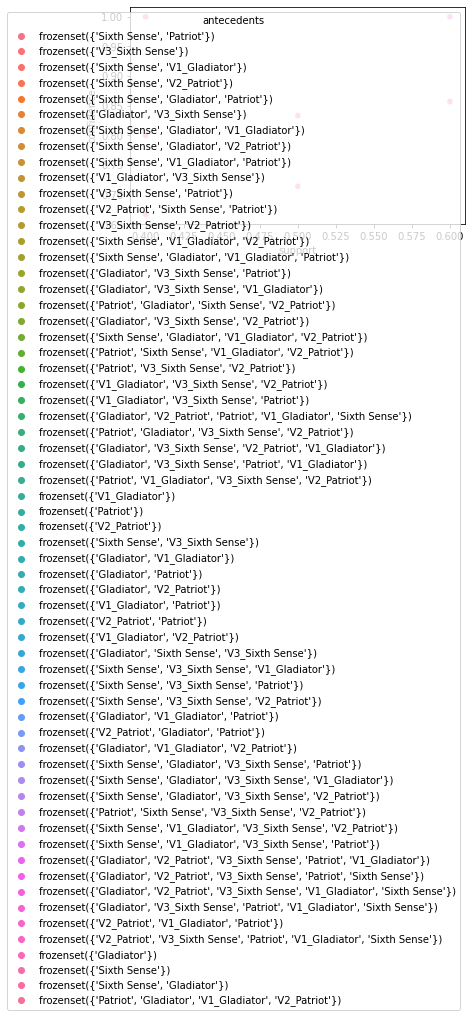

In [246]:
sns.scatterplot('support', 'confidence', data=rule5, hue='antecedents')

plt.show()